In [3]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
# from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import seaborn as sns

In [4]:
df=pd.read_csv('bank.csv')

In [6]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [7]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

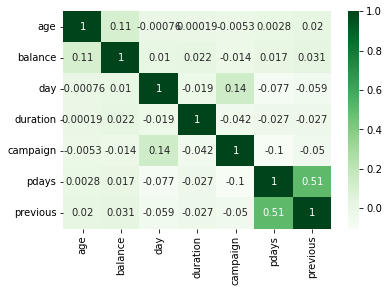

In [12]:
sns.heatmap(df.corr(),annot=True,cmap='Greens')

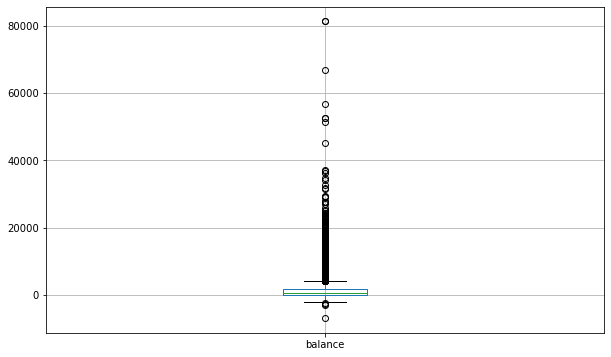

In [15]:
plt.figure(figsize=(10,6))
df.boxplot('balance')

In [18]:
df['balance'].describe()

count    11162.000000
mean      1528.538524
std       3225.413326
min      -6847.000000
25%        122.000000
50%        550.000000
75%       1708.000000
max      81204.000000
Name: balance, dtype: float64

In [21]:
df.drop(df[df['balance']>1708].index,inplace=True,axis=0)

In [22]:
df.drop(df[df['balance']<122].index,axis=0,inplace=True)

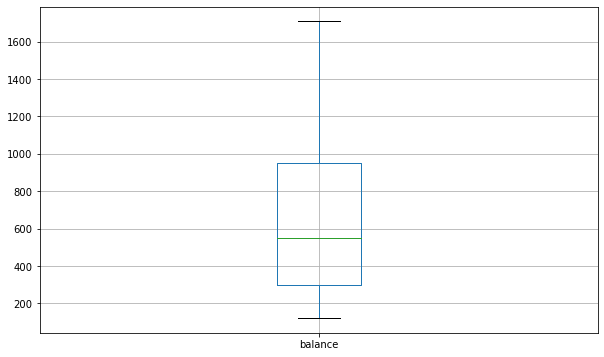

In [23]:
plt.figure(figsize=(10,6))
df.boxplot('balance')

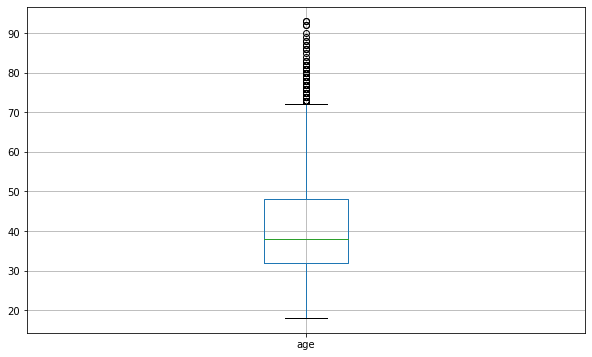

In [24]:
plt.figure(figsize=(10,6))
df.boxplot('age')

In [45]:
df['age'].describe()

count    5589.000000
mean       40.385758
std        11.693628
min        18.000000
25%        32.000000
50%        38.000000
75%        48.000000
max        93.000000
Name: age, dtype: float64

In [46]:
df.drop(df[df['age']>48].index,inplace=True,axis=0)
df.drop(df[df['age']<32].index,axis=0,inplace=True)

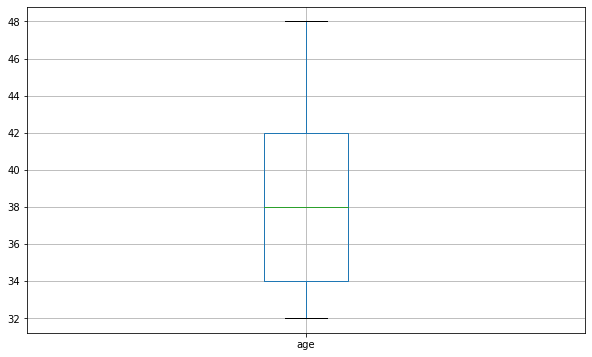

In [47]:
plt.figure(figsize=(10,6))
df.boxplot('age')

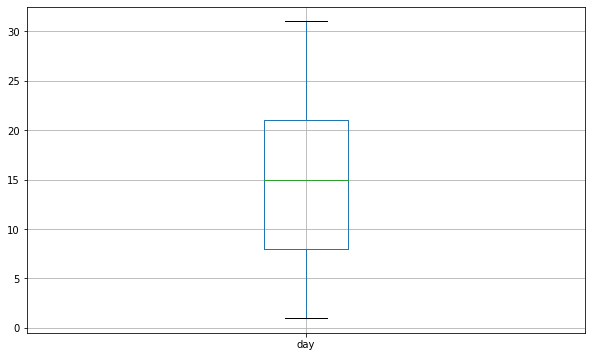

In [48]:
plt.figure(figsize=(10,6))
df.boxplot('day')

In [49]:
df['day'].describe()

count    2896.000000
mean       15.275552
std         8.346845
min         1.000000
25%         8.000000
50%        15.000000
75%        21.000000
max        31.000000
Name: day, dtype: float64

In [50]:
print("Old shape:",df.shape)

df.drop(df[df['day']>19].index,axis=0,inplace=True)
df.drop(df[df['day']<12].index,axis=0,inplace=True)

print("New shape:",df.shape)


Old shape: (2896, 17)
New shape: (937, 17)


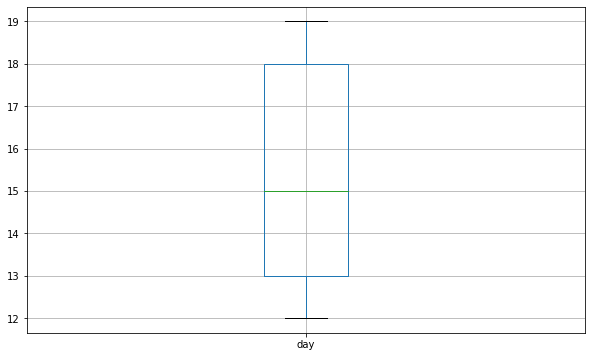

In [51]:
plt.figure(figsize=(10,6))
df.boxplot('day')

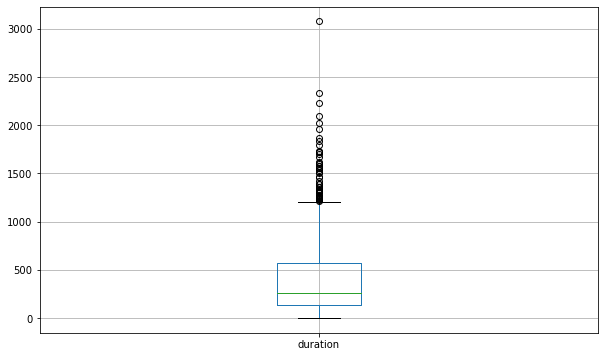

In [52]:
plt.figure(figsize=(10,6))
df.boxplot('duration')

In [53]:
df['duration'].describe()

count     937.000000
mean      410.012807
std       396.044313
min         2.000000
25%       137.000000
50%       262.000000
75%       567.000000
max      3076.000000
Name: duration, dtype: float64

In [54]:
df.drop(df[df['duration']>567].index,inplace=True,axis=0)
df.drop(df[df['duration']<137].index,axis=0,inplace=True)

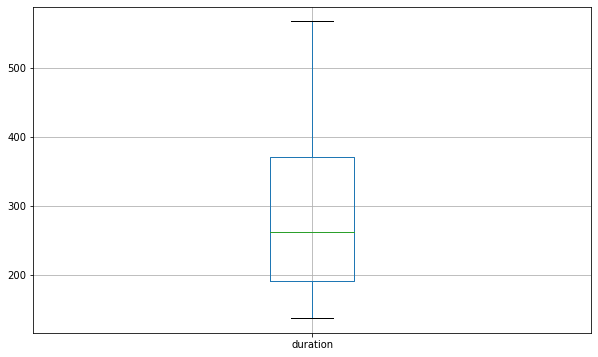

In [55]:
plt.figure(figsize=(10,6))
df.boxplot('duration')

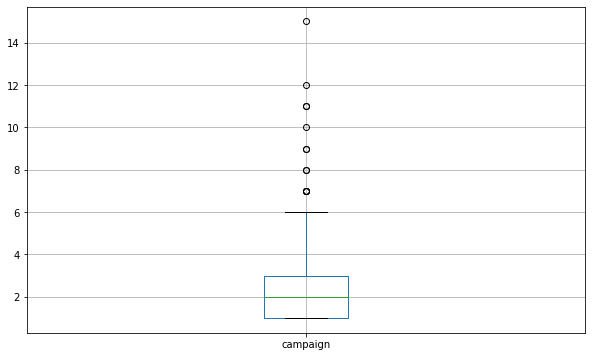

In [56]:
plt.figure(figsize=(10,6))
df.boxplot('campaign')

In [57]:
df['campaign'].describe()

count    471.000000
mean       2.214437
std        1.759680
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max       15.000000
Name: campaign, dtype: float64

In [58]:
df.drop(df[df['campaign']>3].index,inplace=True,axis=0)
df.drop(df[df['campaign']<1].index,axis=0,inplace=True)

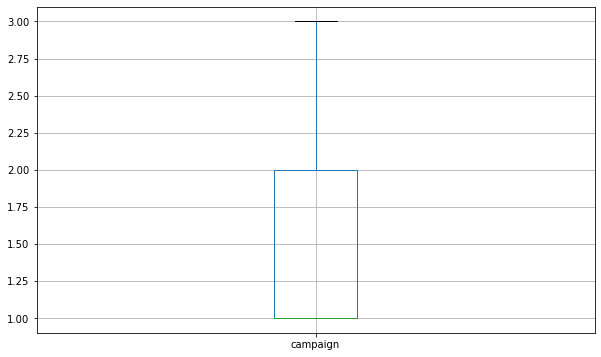

In [59]:
plt.figure(figsize=(10,6))
df.boxplot('campaign')

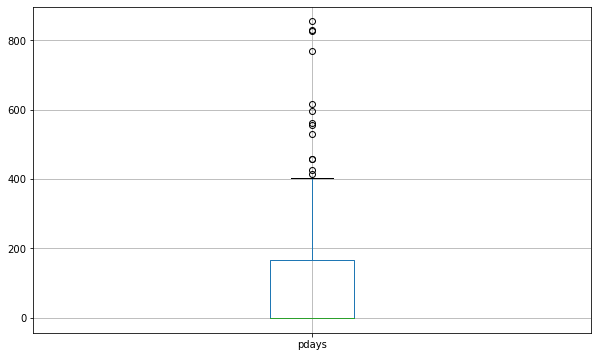

In [60]:
plt.figure(figsize=(10,6))
df.boxplot('pdays')

In [61]:
df['pdays'].describe()

count    398.000000
mean      84.871859
std      148.480282
min       -1.000000
25%       -1.000000
50%       -1.000000
75%      164.750000
max      854.000000
Name: pdays, dtype: float64

In [64]:
df.drop(df[df['pdays']>164].index,axis=0,inplace=True)

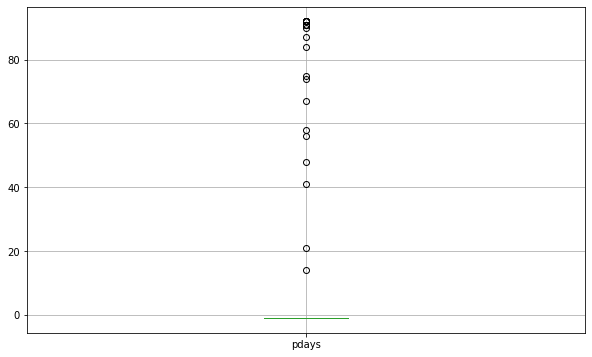

In [65]:
plt.figure(figsize=(10,6))
df.boxplot('pdays')

In [66]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
65,44,blue-collar,married,unknown,no,146,yes,no,unknown,15,may,483,1,-1,0,unknown,yes
75,36,services,single,unknown,no,281,yes,no,unknown,16,may,515,1,-1,0,unknown,yes
94,43,services,divorced,secondary,no,1040,yes,no,unknown,19,may,552,3,-1,0,unknown,yes
469,44,blue-collar,married,primary,no,1265,yes,no,cellular,16,jul,555,1,-1,0,unknown,yes
484,39,technician,married,secondary,no,251,yes,no,cellular,17,jul,342,2,-1,0,unknown,yes


In [67]:
df.shape

(277, 17)

In [68]:
def preprocessor(df):
    res_df = df.copy()
    le = preprocessing.LabelEncoder()
    
    res_df['job'] = le.fit_transform(res_df['job'])
    res_df['marital'] = le.fit_transform(res_df['marital'])
    res_df['education'] = le.fit_transform(res_df['education'])
    res_df['default'] = le.fit_transform(res_df['default'])
    res_df['housing'] = le.fit_transform(res_df['housing'])
    res_df['loan'] = le.fit_transform(res_df['loan'])
    res_df['contact'] = le.fit_transform(res_df['contact'])
    res_df['month'] = le.fit_transform(res_df['month'])
    res_df['poutcome'] = le.fit_transform(res_df['poutcome'])
    res_df['deposit'] = le.fit_transform(res_df['deposit'])
    return res_df

In [69]:
encoded_df = preprocessor(df)
encoded_df.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
65,44,1,1,3,0,146,1,0,2,15,8,483,1,-1,0,3,1
75,36,6,2,3,0,281,1,0,2,16,8,515,1,-1,0,3,1


In [70]:
x = encoded_df.drop('deposit',axis=1).values
y = encoded_df['deposit'].values

In [73]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [74]:
model_dt_2 = DecisionTreeClassifier(random_state=1,max_depth=2)

model_dt_2.fit(x_train,y_train)

model_dt_2_score_tarin = model_dt_2.score(x_train,y_train)

model_dt_2_score_test = model_dt_2.score(x_test,y_test)

print('Trining Score',model_dt_2_score_tarin)

print('Testing Score',model_dt_2_score_test)

Trining Score 0.7239819004524887
Testing Score 0.6785714285714286


In [75]:
model_dt_4 = DecisionTreeClassifier(random_state=1,max_depth=4)

model_dt_4.fit(x_train,y_train)

model_dt_4_score_tarin = model_dt_4.score(x_train,y_train)

model_dt_4_score_test = model_dt_4.score(x_test,y_test)

print('Trining Score',model_dt_4_score_tarin)

print('Testing Score',model_dt_4_score_test)

Trining Score 0.7873303167420814
Testing Score 0.7142857142857143


In [76]:
model_dt_6 = DecisionTreeClassifier(random_state=1,max_depth=6)

model_dt_6.fit(x_train,y_train)

model_dt_6_score_tarin = model_dt_6.score(x_train,y_train)

model_dt_6_score_test = model_dt_6.score(x_test,y_test)

print('Trining Score',model_dt_6_score_tarin)

print('Testing Score',model_dt_6_score_test)

Trining Score 0.8642533936651584
Testing Score 0.6964285714285714


In [77]:
model_dt_8 = DecisionTreeClassifier(random_state=1,max_depth=8)

model_dt_8.fit(x_train,y_train)

model_dt_8_score_tarin = model_dt_8.score(x_train,y_train)

model_dt_8_score_test = model_dt_8.score(x_test,y_test)

print('Trining Score',model_dt_8_score_tarin)

print('Testing Score',model_dt_8_score_test)

Trining Score 0.9683257918552036
Testing Score 0.6964285714285714


In [78]:
model_dt_8 = DecisionTreeClassifier(random_state=1,max_depth=8)

model_dt_8.fit(x_train,y_train)

model_dt_8_score_tarin = model_dt_8.score(x_train,y_train)

model_dt_8_score_test = model_dt_8.score(x_test,y_test)

print('Trining Score',model_dt_8_score_tarin)

print('Testing Score',model_dt_8_score_test)

Trining Score 0.9683257918552036
Testing Score 0.6964285714285714


In [87]:
predictions = model_dt_6.predict(x_test)
# print(predictions)

print(model_dt_6.score(x_test,y_test))
y_actual_result = y_test[0]
# print(y_actual_result)

0.6964285714285714
